In [ ]:
import numpy as np # Álgebra lineal
from matplotlib import pyplot as plt # Gráficas 
from copy import deepcopy # Copia de vectores de dimensión arbitraria por bloques
# Control de los plots en un cuadernillo interactivo
%matplotlib inline 

def K_means(data,k):
    #### K-means ####
    # Número de elementos del conjunto
    n = data.shape[0]

    print (n)
    # Dimensión de los datos 
    m = data.shape[1] # número de características de cada elemento del dataset y del centroide
    print (m)

    # Generar los centroides de forma aleatoria, dentro del área definida por la media y la desviación
    # estándar de los datos
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centroids = np.random.randn(k,m)*std + mean
    print ("centroides", centroids)
    # posiciones de los centroides en el paso anterior
    centroids_prev = np.zeros(centroids.shape) 
    # posiciones de los centroides en el paso siguiente
    centroids_new = deepcopy(centroids) 

    # Etiquetas y distancias para cada uno de los elementos del dataset
    labels = np.zeros(n)
    distances = np.zeros((n,k))

    # La condición de parada se establece sobre la diferencia entre los centroides anteriores y los nuevos:
    # si no hay cambios en sus posiciones, no ha habido reetiquetado, luego el algoritmo para.
    error = np.linalg.norm(centroids_new - centroids_prev)
    iteration=0;


    #ACTUALIZAR POSICION Y REETIQUETAR
    # Si la estimación de los centroides no cambia, se termina el bucle de actualización 

    while error != 0:
        # Medir la distancia a cada centroide
        print ("Iteración: ", iteration, "Error: ", error)
        for i in range(k):
            # elemento por elemento, calcula su distancia del j-ésimo punto a su centroide
            # La sintaxis ":" representa un bucle implícito (operación "element-wise")
            #norma nos dice distancia entre los datos
            distances[:,i] = np.linalg.norm(data - centroids_new[i], axis=1)

        # Asigna las etiquetas de cada cluster, la función argmin retorna los índices (valores de i)
        # correspondientes a las distancias ordenadas de menor a mayor.
        labels = np.argmin(distances, axis = 1)
        print ("labels", labels)
        centroids_prev = deepcopy(centroids_new)
        # Calcula la nueva media para cada cluster y actualiza su centroide
        for i in range(k):
            centroids_new[i] = np.mean(data[labels == i], axis=0)

        # Se usa como criterio de convergencia la norma de la distancia entre los centroides anteriores y nuevos.
        error = np.linalg.norm(centroids_new - centroids_prev)
        iteration += 1

    return centroids_new,labels

Dataset original:


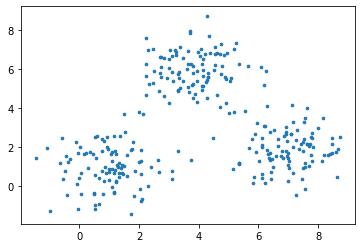

In [ ]:
# Se crean tres centros, el modelo debería retornar valores similares para los centroides calculados



center_1 = np.array([1,1])
center_2 = np.array([4,6])
center_3 = np.array([7,2])

# Se generan datos de forma aleatoria localizados alrededor de cada centro 
data_1 = np.random.randn(100,2) + center_1
data_2 = np.random.randn(100,2) + center_2
data_3 = np.random.randn(100,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)
print("Dataset original:")
plt.scatter(data[:,0], data[:,1], s=7)
plt.show()

300
2
centroides [[ 5.51489353 -1.37609553]
 [ 5.73776204  5.22432464]
 [ 7.43554661  2.71866411]]
Iteración:  0 Error:  12.457995768766931
labels [0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 1 2 2 2
 2 2 2 2]
Iteración:  1 Error:  4.923122323166988
labels [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

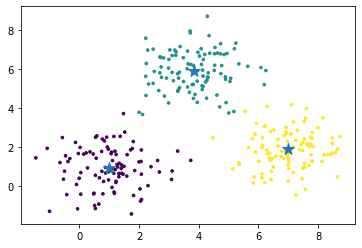

In [ ]:
(centroids,labels)=K_means(data,3)
print("Elementos clasificados:")

print("Resultado de la clusterización:")
plt.scatter(data[:,0], data[:,1], c=labels, s=7 , cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='*',  s=150)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

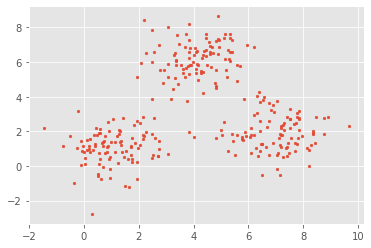

In [ ]:
data_1 = np.random.randn(100,2) + center_1
data_2 = np.random.randn(100,2) + center_2
data_3 = np.random.randn(100,2) + center_3
data = np.concatenate((data_1, data_2, data_3), axis = 0)
x=data[:,0]
y=data[:,1]
plt.scatter(x,y,s=7)
plt.show()

In [ ]:
X=np.column_stack((x,y))
# Mostrar el 5 % de los datos
for i in range(int(len(X)*.05)):
    print (X[i])

NameError: ignored

In [ ]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

NameError: ignored

coordenada: [-0.34914284 -0.96368675] índice de cluster: 1
coordenada: [2.70168781 0.54868063] índice de cluster: 1
coordenada: [ 1.64674515 -1.2126161 ] índice de cluster: 1
coordenada: [1.81826196 2.37358774] índice de cluster: 1
coordenada: [1.23087439 0.18510344] índice de cluster: 1
coordenada: [ 1.94452607 -0.74530886] índice de cluster: 1
coordenada: [-0.51736397  1.71377012] índice de cluster: 1
coordenada: [1.73090496 1.15647396] índice de cluster: 1
coordenada: [1.13503905 0.81456184] índice de cluster: 1
coordenada: [-0.77257224  1.14663096] índice de cluster: 1
coordenada: [0.53704224 0.11366857] índice de cluster: 1
coordenada: [0.73440879 1.42730544] índice de cluster: 1
coordenada: [0.37252713 1.79536776] índice de cluster: 1
coordenada: [2.04536138 1.1827942 ] índice de cluster: 1
coordenada: [2.15938154 1.54072904] índice de cluster: 1


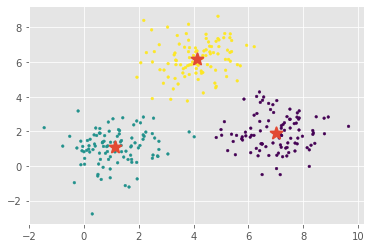

In [ ]:
# Mostrar el 5 % de los datos
for i in range(int(len(X)*.05)):
    print("coordenada:",X[i], "índice de cluster:", labels[i])


plt.scatter(X[:,0], X[:,1], c=labels, s=7, cmap='viridis')
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "*", s=150, linewidths = 2, zorder = 10)

plt.show()

# GRAFICA DE **CODO**

Cluster 1 Función de costo 3802.455456221209
Cluster 2 Función de costo 1896.741495732277
Cluster 3 Función de costo 574.2853576389273
Cluster 4 Función de costo 496.7282007299644
Cluster 5 Función de costo 421.4035698687345
Cluster 6 Función de costo 355.9141736721216
Cluster 7 Función de costo 311.8304943210783


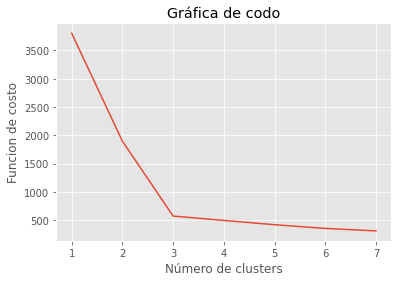

In [ ]:
costo = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    #INERTIA = SUMATORIA RESTA Y ELEVAR AL CUADRADO 
    costo.append(kmeans.inertia_)
    print("Cluster", i, "Función de costo", kmeans.inertia_)

plt.plot(range(1,8),costo)
plt.title("Gráfica de codo")
plt.xlabel("Número de clusters")
plt.ylabel("Funcion de costo") 
plt.show()

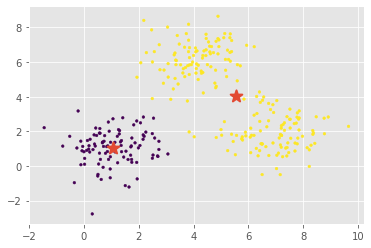

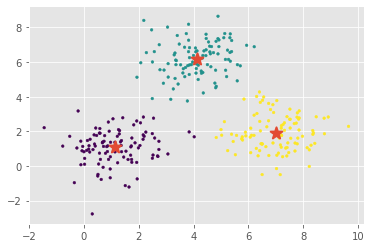

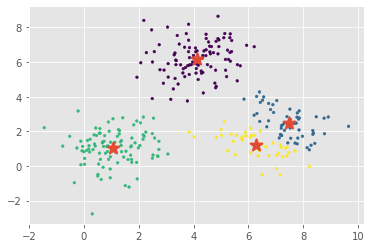

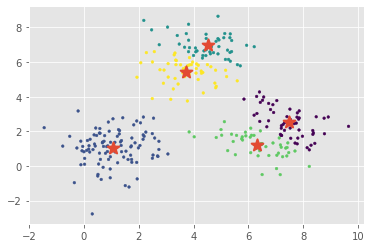

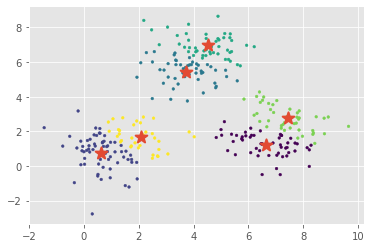

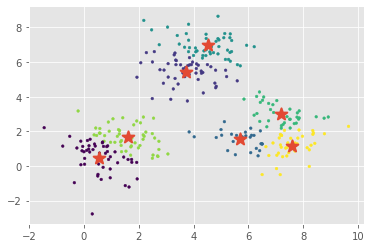

In [ ]:
for i in range(2,8): 
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)

    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    plt.scatter(X[:,0], X[:,1], c=labels, s=7, cmap='viridis')
    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "*", s=150, linewidths = 2, zorder = 10)

    plt.show()
    i=i+1

# **DBSCAN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Se comparará el desempeño de DBSCAN vs. KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

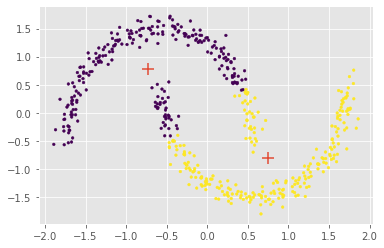

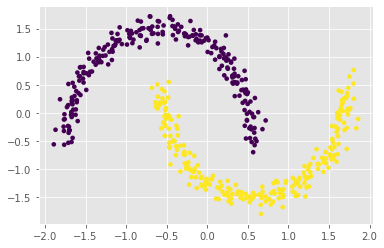

In [ ]:
# se crean los clusters de ejemplo usando sklearn datasets
from sklearn.datasets import make_moons

data = make_moons(500, noise=0.055)[0]

# Estandarizar los datos a la media y la desviación estándar
for x in range(2):
    m = data[:,x].mean()
    s = data[:,x].std()
    for y in range(len(data)):
        data[y,x] = (data[y,x] - m)/s

# Resultado mediante KMeans
result_k = KMeans(n_clusters=2).fit(data)

centroids=result_k.cluster_centers_
labels = result_k.labels_
plt.scatter(data[:,0], data[:,1], c=labels, s=7 )
#CLASIFICACION INSATISFACTORIA
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "+", s=150, linewidths = 2, zorder = 10)
plt.show()

# DBSCAN desde Scikit-Learn
dbscan = DBSCAN(eps=0.2, min_samples = 2)
clusters = dbscan.fit_predict(data)
#clasificacion mas adecuada 
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=7, linewidths = 2, zorder = 10)

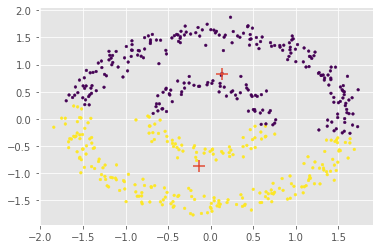

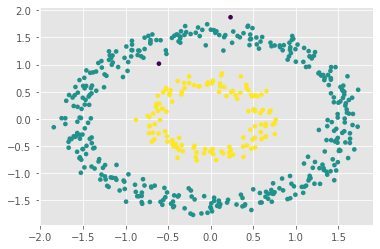

In [ ]:
# se crean los clusters de ejemplo usando sklearn datasets
from sklearn.datasets import make_circles

data_a = make_circles(250, noise=0.055, factor=.9)[0]
data_b = make_circles(250, noise=0.055, factor=.4)[0]
data=np.concatenate((data_a, data_b), axis=0)

# Estandarizar los datos a la media y la desviación estándar
for x in range(2):
    m = data[:,x].mean()
    s = data[:,x].std()
    for y in range(len(data)):
        data[y,x] = (data[y,x] - m)/s

# Resultado mediante KMeans
result_k = KMeans(n_clusters=2).fit(data)

centroids=result_k.cluster_centers_
labels = result_k.labels_
plt.scatter(data[:,0], data[:,1], c=labels, s=7 )
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "+", s=150, linewidths = 2, zorder = 10)
plt.show()

# DBSCAN desde Scikit-Learn
dbscan = DBSCAN(eps=0.2, min_samples = 2)
clusters = dbscan.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=7, linewidths = 2, zorder = 10)

# **MEZCLA GAUSSIANA**

[[ 0.4997845   6.26373486]
 [-2.89316688  2.45595805]
 [-3.12893804  3.09392135]
 [ 0.65739733  4.31602274]
 [-2.70375676  2.29560231]
 [-1.77876538  7.80040115]
 [ 2.25121474  0.82895839]
 [-0.15345841  4.15486913]
 [-1.83433668  3.04481916]
 [ 1.71950845  1.33191447]
 [-0.89961909  7.81712545]
 [ 2.59654461  0.06894721]
 [ 2.56509832  3.28573136]
 [-2.5394783   3.47809083]
 [-0.66949462  2.96328154]
 [ 3.42440614  1.17072899]
 [-1.85510894  1.37687336]
 [ 1.55154445  0.32856857]
 [ 1.25790923  3.82442026]
 [-1.17782082  3.65146277]
 [-0.98691985  3.63848944]
 [-2.16303829  2.62085993]
 [-2.07259605  7.0373226 ]
 [ 1.09294153  4.74830933]
 [ 0.78866772  4.8655068 ]
 [-2.25971391  6.98807992]
 [-0.52416885  7.13811117]
 [ 0.40706768  3.09538951]
 [ 1.80789093  4.52564716]
 [ 3.63678379  0.86808365]
 [ 1.42436215  3.1719181 ]
 [ 0.45857598  5.38389754]
 [-2.32476573  3.46735253]
 [ 0.62764736  5.65445977]
 [-1.28967113  4.33261275]
 [-1.31944387  7.84895558]
 [ 2.04429004  1.01031338]
 

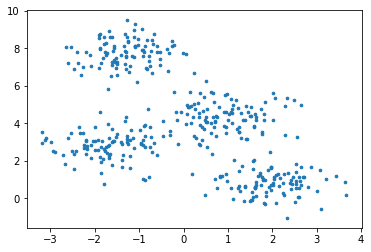

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# Control de los plots en un cuadernillo interactivo
%matplotlib inline 

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.70, random_state=0)

print(X)
plt.scatter(X[:, 0], X[:, 1], s=7)
plt.show()

Clasificación no-supervisada mediante mezcla de gaussianas


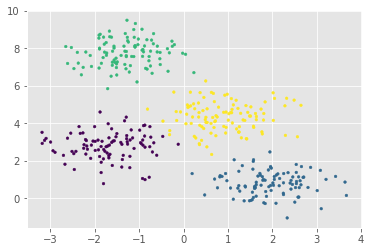

Etiqueta original, de la generación de los datos aleatorios


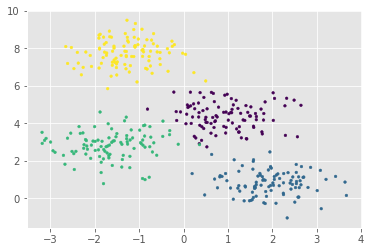

In [ ]:
the_gmm = GMM(n_components=4).fit(X)
labels = the_gmm.predict(X)
print("Clasificación no-supervisada mediante mezcla de gaussianas")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis');
plt.show()
print("Etiqueta original, de la generación de los datos aleatorios")
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=7, cmap='viridis');
plt.show()

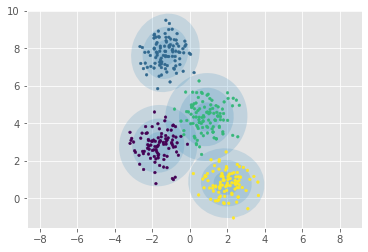

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    
    ax = ax or plt.gca()
    
    # Convierte la covarianza a ejes principales de una elipsoide 
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance) # usa descomposición en valores singulares de la matriz de covarianza
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0])) #obtiene el ángulo del elipsoide 
        width, height = 2 * np.sqrt(s) #establece el ancho y el alto del elipsoide a dos veces la desviación estándar
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Dibuja la elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
plot_gmm(the_gmm,X)